# Structured Data Example

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# My Imports 
import StructuredData as SD
import General as Gen

# Standard Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Pytorch Imports
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

PATH = 'data/StructuredDataExample/'

### Generate The Data

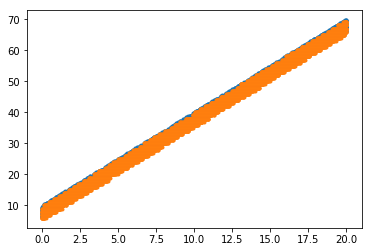

In [3]:
x1 = np.random.uniform(0,20,10000)
x2 = np.random.randint(0,3,10000)
z = np.random.uniform(-1,1,10000)
y = 3*x1 + 7 + x2 + z
y2 = np.zeros(10000,int)
for i in range(10000):y2[i] = int(y[i])
plt.plot(x1,y,'.')
plt.plot(x1,y2,'.')

### Continuous outputs y

In [4]:
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
train_df, val_df = SD.SplitDataFrameTrainVal(df)
print(len(train_df),len(val_df))

8000 2000


In [5]:
# data object
cat_vars = ['x2']
cont_vars = ['x1','y']
output_var = 'y'
bs = 128
data = SD.StructuredDataObj.from_dataframes(train_df, val_df, cat_vars, cont_vars, output_var, bs)

# pytorch model
fc_layer_sizes = [50,10,1]
emb_sizes = 'default'
output_range = [0,75]
dropout_levels = (0,0,[0,0,0])
use_bn = True
model = SD.StructuredDataNet.from_dataobj(data, fc_layer_sizes, emb_sizes, output_range, dropout_levels, use_bn)

# optimizer and loss function
optimizer = optim.Adam(model.parameters())
loss_func = nn.MSELoss()

# metrics
def double(Y_PRED,Y):
    return 2*(loss_func(Y_PRED,Y))

def triple(Y_PRED,Y):
    return 3*(loss_func(Y_PRED,Y))

# learner object
learner = Gen.Learner(PATH,data,model,optimizer,loss_func)

/home/paperspace/fastai/courses/dl1/StructuredData.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  for var in cat_vars: df[var] = df[var].astype('category')
/home/paperspace/fastai/courses/dl1/StructuredData.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  for var in cont_vars: df[var] = df[var].astype('float32')
/home/paperspace/fastai/courses/dl1/StructuredData.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

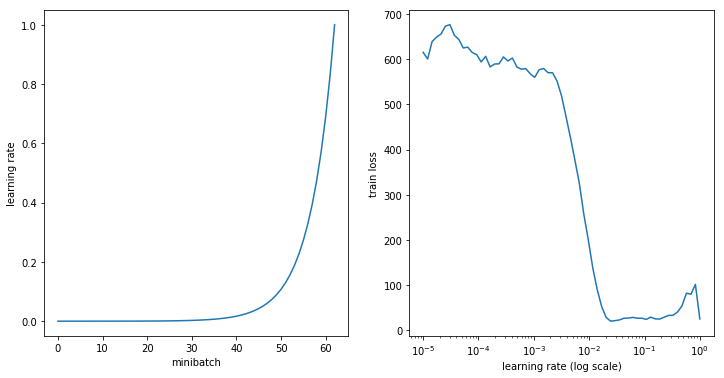

In [6]:
learner.find_lr()

In [7]:
learner.fit(lr=0.001,num_epochs = 5,save_name = 'lr001_const',metrics=[double,triple])
#learner.fit(lr=0.001,num_epochs = 5,save_name = 'lr001_const',metrics=[double])
#learner.fit(lr=0.001,num_epochs = 5,save_name = 'lr001_const')

epoch   train_loss  val_loss    metrics     

0       36.44235    35.91615    71.83231    107.74846     epoch run time: 0 min, 1.04 sec
1       4.26049     4.38407     8.76813     13.15220      epoch run time: 0 min, 0.90 sec
2       1.92498     2.03952     4.07904     6.11856       epoch run time: 0 min, 0.94 sec
3       1.53778     1.60181     3.20362     4.80542       epoch run time: 0 min, 0.96 sec
4       1.14806     1.19573     2.39147     3.58720       epoch run time: 0 min, 0.97 sec


In [8]:
learner.load('lr001_const')

y_pred = learner.predict()
print(y_pred)
y = learner.data.val_ds.y
print(y)
y = Variable(torch.Tensor(y))
y_pred = Variable(torch.Tensor(y_pred))
loss = loss_func(y_pred,y)
print(loss)

[12.585001 56.161438 30.152163 ... 53.778652 49.620968 39.14047 ]
[13.022941 55.407093 30.633144 ... 53.967216 49.822674 38.16652 ]
Variable containing:
 1.1957
[torch.FloatTensor of size 1]



In [9]:
learner.fit(lr=0.001,num_epochs = 10,save_name = 'lr001_const')

epoch   train_loss  val_loss    

0       1.03651     1.07935       epoch run time: 0 min, 0.95 sec
1       0.91543     0.95046       epoch run time: 0 min, 0.90 sec
2       0.89798     0.90466       epoch run time: 0 min, 0.97 sec
3       1.15885     1.18768       epoch run time: 0 min, 0.95 sec
4       0.91232     0.94636       epoch run time: 0 min, 0.92 sec
5       0.70700     0.72711       epoch run time: 0 min, 0.94 sec
6       0.60799     0.61941       epoch run time: 0 min, 0.96 sec
7       0.85798     0.88329       epoch run time: 0 min, 0.96 sec
8       0.74098     0.74395       epoch run time: 0 min, 1.02 sec
9       0.75316     0.75557       epoch run time: 0 min, 0.96 sec


In [10]:
learner.load('lr001_const')

y_pred = learner.predict()
print(y_pred)
y = learner.data.val_ds.y
print(y)
y = Variable(torch.Tensor(y))
y_pred = Variable(torch.Tensor(y_pred))
loss = loss_func(y_pred,y)
print(loss)

[12.940866 54.711643 30.397614 ... 53.91812  49.47947  38.992107]
[13.022941 55.407093 30.633144 ... 53.967216 49.822674 38.16652 ]
Variable containing:
 0.6194
[torch.FloatTensor of size 1]



val_loss increased too much, stopping training early


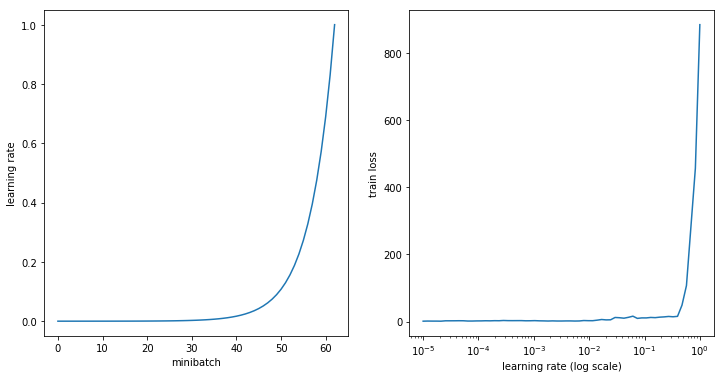

In [11]:
learner.find_lr()

In [12]:
y_pred = learner.predict()
print(y_pred)
y = learner.data.val_ds.y
print(y)
y = Variable(torch.Tensor(y))
y_pred = Variable(torch.Tensor(y_pred))
loss = loss_func(y_pred,y)
print(loss)

[12.940866 54.711643 30.397614 ... 53.91812  49.47947  38.992107]
[13.022941 55.407093 30.633144 ... 53.967216 49.822674 38.16652 ]
Variable containing:
 0.6194
[torch.FloatTensor of size 1]



In [13]:
learner.load('lr001_const')

print('Model State')
for param in learner.model.parameters():
    print(param.data)

print('Optimizer State')
for param_group in learner.optimizer.param_groups:
    print(param_group)

Model State

 0.2078  0.3816
 0.3321 -0.3855
 0.3196  0.0817
-0.4296  0.5000
[torch.cuda.FloatTensor of size 4x2 (GPU 0)]


 0.5215
 0.6235
 0.0673
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0
 0
 0
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.7325
 0.5839
 0.7735
 0.8959
 0.8407
 0.6488
 0.2220
 0.2823
 1.0152
 0.7344
 0.5048
 1.0620
 0.4835
 0.0392
 0.0623
 0.0937
 0.2483
 0.8292
 0.8743
 1.0810
 0.5534
 0.7095
 0.9332
 0.9828
 0.7319
 0.1183
 0.4763
 0.5157
 0.4157
 0.2760
 0.6429
 0.4932
 0.3112
 0.5781
 0.2586
 0.3228
 0.9656
 0.8409
 0.7349
 0.2008
 0.3771
 0.4418
 0.7679
 0.3646
 0.1837
 0.8828
 0.0592
 0.1161
 0.8398
 0.5617
[torch.cuda.FloatTensor of size 50 (GPU 0)]


-0.0060
-0.0602
-0.0434
 0.0516
 0.0529
-0.0546
-0.0511
 0.0130
-0.0082
-0.0642
 0.0164
-0.0483
-0.1110
 0.0414
 0.0223
-0.0203
-0.0517
-0.0377
-0.0643
 0.0281
 0.0060
-0.0733
-0.0628
 0.0347
-0.0466
-0.0648
-0.0205
-0.0573
 0.0130
-0.0136
-0.0013
-0.0316
 0.0438
-0.0751
 0.0743
-0.0479
-0.0141
-0.0687
-0.

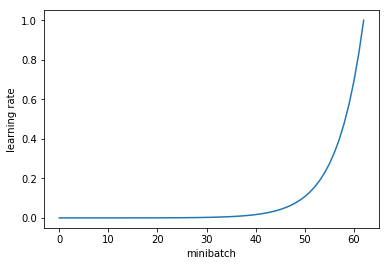

In [15]:
learner.plot_lr_sched()

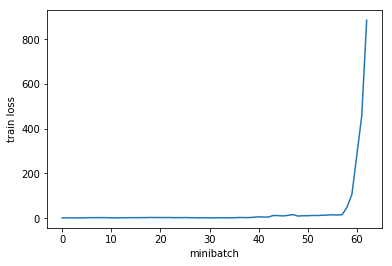

In [16]:
learner.plot_loss_sched()

In [17]:
learner.fit(lr=0.001,num_cycles=4,base_cycle_length=1,cycle_mult=2)

epoch   train_loss  val_loss    

0       0.97514     0.98065       epoch run time: 0 min, 0.96 sec
1       0.57882     0.58975       epoch run time: 0 min, 0.87 sec
2       0.63978     0.66398       epoch run time: 0 min, 0.94 sec
3       0.61813     0.64120       epoch run time: 0 min, 0.91 sec
4       0.56090     0.57248       epoch run time: 0 min, 0.91 sec
5       0.58035     0.59177       epoch run time: 0 min, 0.98 sec
6       0.52297     0.50554       epoch run time: 0 min, 0.92 sec
7       0.66734     0.66501       epoch run time: 0 min, 0.97 sec
8       0.74509     0.74132       epoch run time: 0 min, 0.95 sec
9       0.52166     0.52162       epoch run time: 0 min, 0.95 sec
10      0.52908     0.50916       epoch run time: 0 min, 0.97 sec
11      0.52303     0.51022       epoch run time: 0 min, 0.91 sec
12      0.54511     0.53636       epoch run time: 0 min, 0.94 sec
13      0.53569     0.52318       epoch run time: 0 min, 0.98 sec
14      0.57288     0.55746       epoch ru

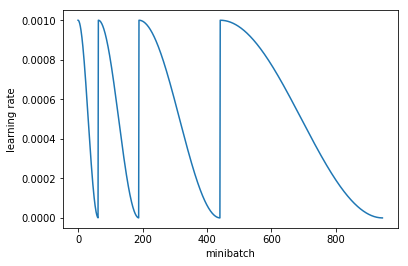

In [18]:
learner.plot_lr_sched()

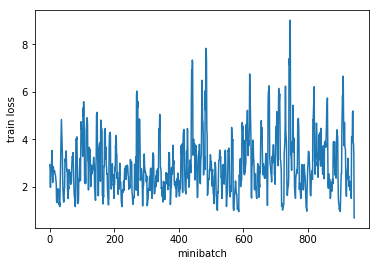

In [19]:
learner.plot_loss_sched()

### Discrete Outputs y2

In [20]:
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y2})
#train_df, val_df = SD.SplitDataFrameTrainVal(df)
train_df, val_df = SD.SplitDataFrameTrainVal(df,val_idxs = list(np.arange(2000)))
print(len(train_df),len(val_df))

8000 2000


In [21]:
# data object
cat_vars = ['x2','y']
cont_vars = ['x1']
output_var = 'y'
bs = 128
data = SD.StructuredDataObj.from_dataframes(train_df, val_df, cat_vars, cont_vars, output_var, bs)

/home/paperspace/fastai/courses/dl1/StructuredData.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  for var in cat_vars: df[var] = df[var].astype('category')
/home/paperspace/fastai/courses/dl1/StructuredData.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  for var in cont_vars: df[var] = df[var].astype('float32')


In [22]:
print(len(data.category_labels[1]))

64


In [23]:
# pytorch model
fc_layer_sizes = [500,500,64]
emb_sizes = 'default'
output_range = None
dropout_levels = (0,0,[0,0,0])
use_bn = True
model = SD.StructuredDataNet.from_dataobj(data, fc_layer_sizes, emb_sizes, output_range, dropout_levels, use_bn)

# optimizer and loss function
#optimizer = optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

# metrics
def double(Y_PRED,Y):
    return 2*(loss_func(Y_PRED,Y))

def triple(Y_PRED,Y):
    return 3*(loss_func(Y_PRED,Y))

# learner object
#learner = Gen.Learner(PATH,data,model,optimizer,loss_func)
learner = Gen.Learner(PATH,data,model)

In [24]:
print(learner.loss_func)
print(learner.optimizer)

CrossEntropyLoss(
)


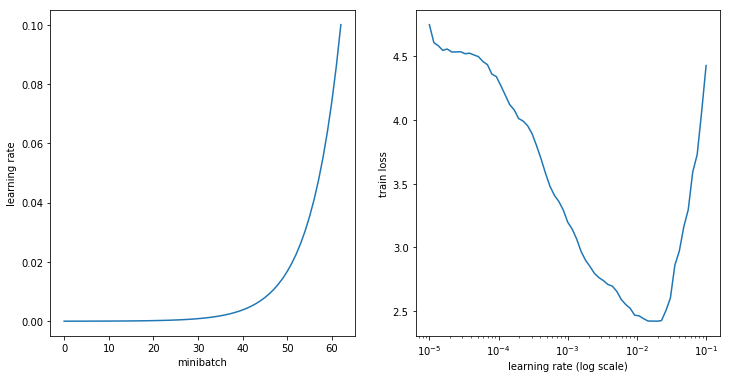

In [25]:
learner.find_lr(max_lr=0.1)

In [26]:
#learner.fit(lr=0.001,num_epochs=3,metrics=[double,triple])
learner.fit(lr=0.001,num_epochs=10,metrics=[triple])
#learner.fit(lr=0.001,num_epochs=10)

epoch   train_loss  val_loss    accuracy    metrics     

0       2.20982     2.22651     0.22900     6.67952       epoch run time: 0 min, 0.96 sec
1       1.86853     1.89319     0.31200     5.67956       epoch run time: 0 min, 1.05 sec
2       1.65406     1.68002     0.34750     5.04005       epoch run time: 0 min, 1.02 sec
3       1.56032     1.58629     0.33950     4.75887       epoch run time: 0 min, 1.05 sec
4       1.47652     1.49738     0.37000     4.49213       epoch run time: 0 min, 1.01 sec
5       1.40730     1.42208     0.38450     4.26625       epoch run time: 0 min, 1.11 sec
6       1.42320     1.44654     0.38150     4.33963       epoch run time: 0 min, 0.98 sec
7       1.31666     1.34465     0.41100     4.03395       epoch run time: 0 min, 1.05 sec
8       1.28288     1.30530     0.42300     3.91590       epoch run time: 0 min, 0.96 sec
9       1.25439     1.28426     0.42200     3.85279       epoch run time: 0 min, 0.95 sec


In [27]:
# Make predictions and get loss. 
loss_func = nn.CrossEntropyLoss()

# Note: Must set softmax_cats = False, for compatibility with loss_func nn.CrossEntropyLoss().
predictions = learner.predict(softmax_cats = False)
pred_probs, pred_labels = predictions[0], predictions[1]
labels = learner.data.val_ds.y
print(pred_labels)
print(labels)
y = Variable(torch.LongTensor(labels))
y_pred = Variable(torch.Tensor(pred_probs))
loss = loss_func(y_pred,y)
print(loss)


[23 31 57 ... 55 20 52]
[23 32 57 ... 55 20 52]
Variable containing:
 1.2843
[torch.FloatTensor of size 1]

